In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
import pandas as pd

In [2]:
df_original = pd.read_csv('day.csv')


In [3]:
df = df_original.copy()
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [4]:
print('Number of Variables: '+str(len(df.columns)))
print('Variables:'+str(list(df.columns)))
print('Shape of dataframe '+ str(df.shape))

Number of Variables: 16
Variables:['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Shape of dataframe (731, 16)


In [5]:
#Hypothesis, sum of casual and registered should be equal to cnt
#Verify our hypothesis
j=0;
for i in range(len(df)):
    if df['cnt'].loc[i] == df['casual'].loc[i] + df['registered'].loc[i]:
        pass;
    else:
        print('not equal')

#Since it did not print "not equal", our hypothesis is correct

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Missing Value Analysis
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Categorical Variable
print(df['season'].value_counts())
print(df['yr'].value_counts())
print(df['mnth'].value_counts())
print(df['holiday'].value_counts())
print(df['weekday'].value_counts())
print(df['workingday'].value_counts())
print(df['weathersit'].value_counts())

#Continuous numberical variable
#print(df['temp'].value_counts())
#print(df['atemp'].value_counts())
#print(df['hum'].value_counts())
#print(df['windspeed'].value_counts())

3    188
2    184
1    181
4    178
Name: season, dtype: int64
1    366
0    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64
0    710
1     21
Name: holiday, dtype: int64
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64
1    500
0    231
Name: workingday, dtype: int64
1    463
2    247
3     21
Name: weathersit, dtype: int64


In [9]:
#Convert Columns into their respective types
df['dteday'] = pd.to_datetime(df['dteday'])

df['season'] = df['season'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['holiday'] =df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

In [10]:
df.describe() 

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df = df.rename(columns={'instant':'record_index','hum':'humidity','cnt':'total_count','weathersit':'weather_category','mnth':'month','dteday':'date'})

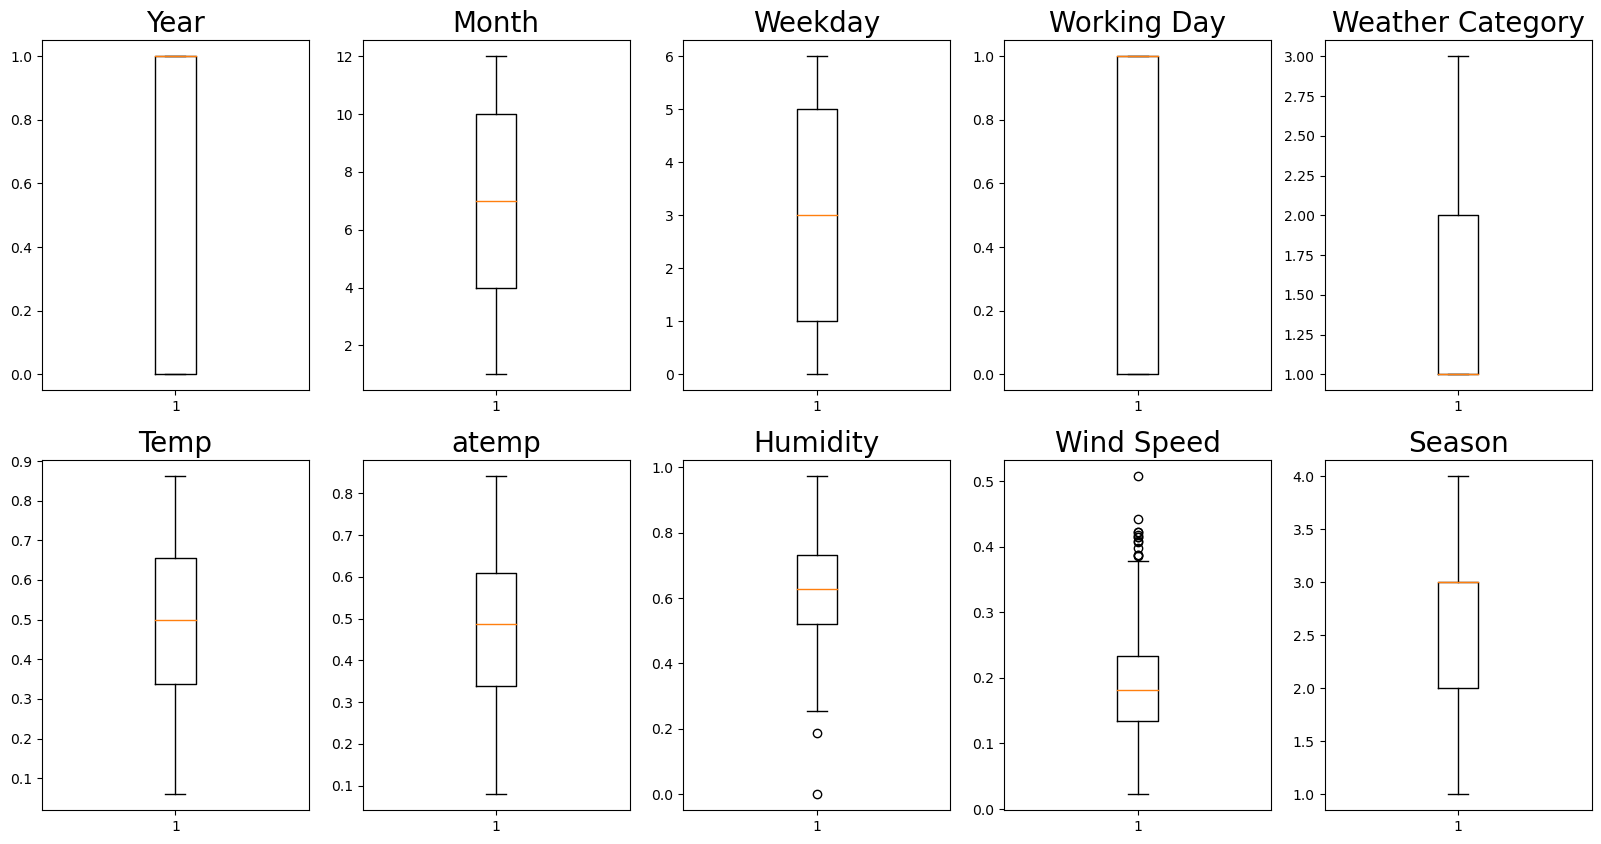

In [12]:
fig, axs  = plt.subplots(2, 5, figsize=(20, 10))

axs[0,0].boxplot(df['yr'])
axs[0,0].set_title('Year', size=20)
axs[0,1].boxplot(df['month'])
axs[0,1].set_title('Month', size=20)
axs[0,2].boxplot(df['weekday'])
axs[0,2].set_title('Weekday', size=20)
axs[0,3].boxplot(df['workingday'])
axs[0,3].set_title('Working Day', size=20)
axs[0,4].boxplot(df['weather_category'])
axs[0,4].set_title('Weather Category', size=20)
axs[1,0].boxplot(df['temp'])
axs[1,0].set_title('Temp', size=20)
axs[1,1].boxplot(df['atemp'])
axs[1,1].set_title('atemp', size=20)
axs[1,2].boxplot(df['humidity'])
axs[1,2].set_title('Humidity', size=20)
axs[1,3].boxplot(df['windspeed'])
axs[1,3].set_title('Wind Speed', size=20)
axs[1,4].boxplot(df['season'])
axs[1,4].set_title('Season', size=20)
plt.show()


In [13]:
c_category = ['season','yr','month','holiday','weekday','workingday','weather_category']

In [14]:
c_continuous = ['temp','atemp','hum','windspeed']

In [15]:
cname = [x for x in df.columns if x not in ['date','registered','casual','cnt','instant','season','yr','month','holiday','weekday','workingday','weather_category']]
cname

['record_index', 'temp', 'atemp', 'humidity', 'windspeed', 'total_count']

In [16]:
#Outlier Analysis, box plot ----------> Remove outlier
for col in cname:
    q75,q25 = np.percentile(df.loc[:,col],[75,25]);
    iqr = q75-q25;
    lower_fence = q25 - (1.5*iqr)
    upper_fence = q75 + (1.5*iqr)

    df_outlier_del = df.drop(df[df.loc[:,col] < lower_fence].index)
    df_outlier_del = df.drop(df[df.loc[:,col] > upper_fence].index)

In [17]:
#Outlier Analysis by considering outliers as NA and imputing values
df_outlier_impute = df.copy()
for col in cname:
    q75,q25 = np.percentile(df.loc[:,col],[75,25]);
    iqr = q75-q25;
    lower_fence = q25 - (1.5*iqr)
    upper_fence = q75 + (1.5*iqr)

    row = df_outlier_impute[df.loc[:,col] < lower_fence].index
    df_outlier_impute.loc[row,col] = np.nan

    row = df_outlier_impute[df.loc[:,col] > upper_fence].index
    df_outlier_impute.loc[row,col] = np.nan

In [18]:
df_outlier_impute.isna().sum()

record_index         0
date                 0
season               0
yr                   0
month                0
holiday              0
weekday              0
workingday           0
weather_category     0
temp                 0
atemp                0
humidity             2
windspeed           13
casual               0
registered           0
total_count          0
dtype: int64

In [19]:
print('Percentage of Missing value:',(15/731)*100)

Percentage of Missing value: 2.0519835841313268


In [20]:
#To check the similarities, lets replace df['weekday][0] = 6
df_outlier_impute.loc[0,'temp'] = np.nan
df_outlier_impute.loc[0,'temp']

nan

In [21]:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_fit = imputer.fit_transform(df_outlier_impute[['temp', 'atemp', 'humidity', 'windspeed']])
df_fit = pd.DataFrame(df_fit, columns = ['temp', 'atemp', 'humidity', 'windspeed'])
print('KNN: ',df_fit.loc[0,'temp'])

df_outlier_impute[['temp', 'atemp', 'humidity', 'windspeed']]=df_fit[['temp', 'atemp', 'humidity', 'windspeed']]

KNN:  0.370703


<AxesSubplot:>

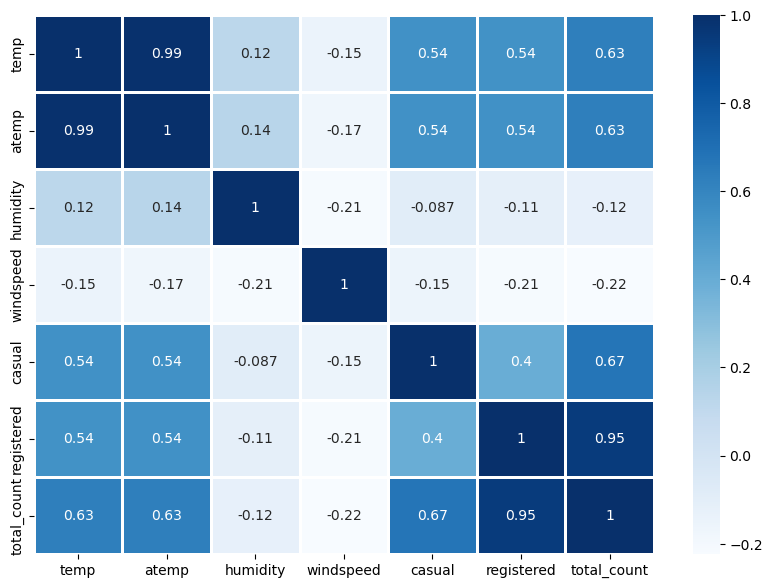

In [22]:
#Correlation plot(only between continuous numerical variable)
fx, ax = plt.subplots(figsize = (10,7))
num_var = df_outlier_impute[['temp','atemp','humidity','windspeed','casual','registered','total_count']]
num_var.corr()
sns.heatmap(num_var.corr(),annot=True,cmap='Blues', linewidth=2)

In [23]:
from scipy.stats import chi2_contingency
#Catigorical variable
c_category = ['season','yr','month','holiday','weekday','workingday','weather_category']

print('------------FOR CASUAL----------------------')
for col_name in c_category:
    print(col_name)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_outlier_impute['casual'],df_outlier_impute[col_name])) 
    print('p :',p)
print('-------------------FOR REGISTERED----------------------')
for col_name in c_category:
    print(col_name)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_outlier_impute['registered'],df_outlier_impute[col_name]))
    print('p :',p)

print('------------------FOR Total Count----------------------')
for col_name in c_category:
    print(col_name)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_outlier_impute['total_count'],df_outlier_impute[col_name]))
    print('p :',p)


------------FOR CASUAL----------------------
season
p : 0.048703961255440444
yr
p : 0.3481918376563397
month
p : 0.060273649090653664
holiday
p : 0.3533439334323666
weekday
p : 0.2216433086875006
workingday
p : 0.1621995359803361
weather_category
p : 0.4459254747923249
-------------------FOR REGISTERED----------------------
season
p : 0.4275987067267258
yr
p : 0.26828415001262285
month
p : 0.34848382338918255
holiday
p : 0.9087188555778071
weekday
p : 0.5149884893327222
workingday
p : 0.4369317743762681
weather_category
p : 0.4705686267889519
------------------FOR Total Count----------------------
season
p : 0.5440596338517547
yr
p : 0.367724209978971
month
p : 0.49177634472851
holiday
p : 0.6781463865579803
weekday
p : 0.4102128310764939
workingday
p : 0.45435914436398794
weather_category
p : 0.6407439686474243


<AxesSubplot:>

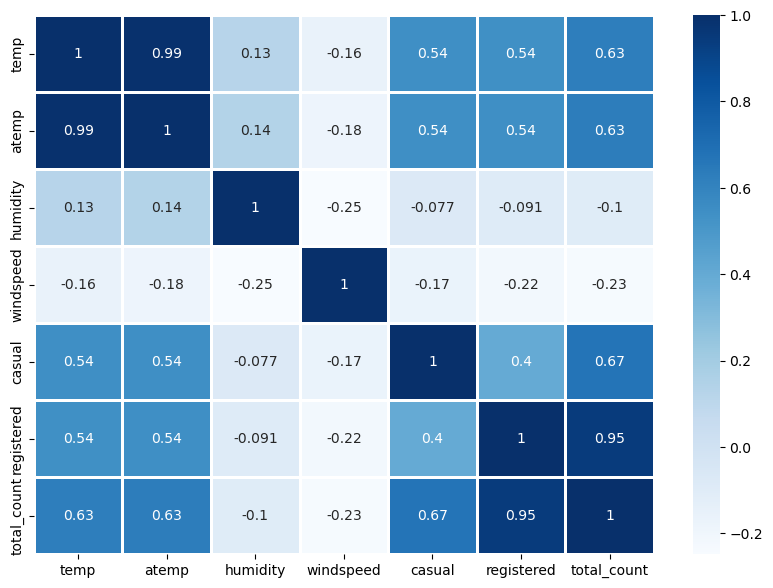

In [24]:
fx, ax = plt.subplots(figsize = (10,7))
num_var = df_outlier_del[['temp','atemp','humidity','windspeed','casual','registered','total_count']]
num_var.corr()
sns.heatmap(num_var.corr(),annot=True,cmap='Blues', linewidth=2)

In [25]:
#Catigorical variable
c_category = ['season','yr','month','holiday','weekday','workingday','weather_category']

print('------------FOR CASUAL----------------------')
for col_name in c_category:
    print(col_name)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_outlier_del['casual'],df_outlier_del[col_name])) 
    print('p :',p)
print('-------------------FOR REGISTERED----------------------')
for col_name in c_category:
    print(col_name)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_outlier_del['registered'],df_outlier_del[col_name]))
    print('p :',p)

print('------------------FOR Total Count----------------------')
for col_name in c_category:
    print(col_name)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_outlier_del['total_count'],df_outlier_del[col_name]))
    print('p :',p)

------------FOR CASUAL----------------------
season
p : 0.048703961255440444
yr
p : 0.3481918376563397
month
p : 0.060273649090653664
holiday
p : 0.3533439334323666
weekday
p : 0.2216433086875006
workingday
p : 0.1621995359803361
weather_category
p : 0.4459254747923249
-------------------FOR REGISTERED----------------------
season
p : 0.4275987067267258
yr
p : 0.26828415001262285
month
p : 0.34848382338918255
holiday
p : 0.9087188555778071
weekday
p : 0.5149884893327222
workingday
p : 0.4369317743762681
weather_category
p : 0.4705686267889519
------------------FOR Total Count----------------------
season
p : 0.5440596338517547
yr
p : 0.367724209978971
month
p : 0.49177634472851
holiday
p : 0.6781463865579803
weekday
p : 0.4102128310764939
workingday
p : 0.45435914436398794
weather_category
p : 0.6407439686474243


<AxesSubplot:xlabel='season', ylabel='registered'>

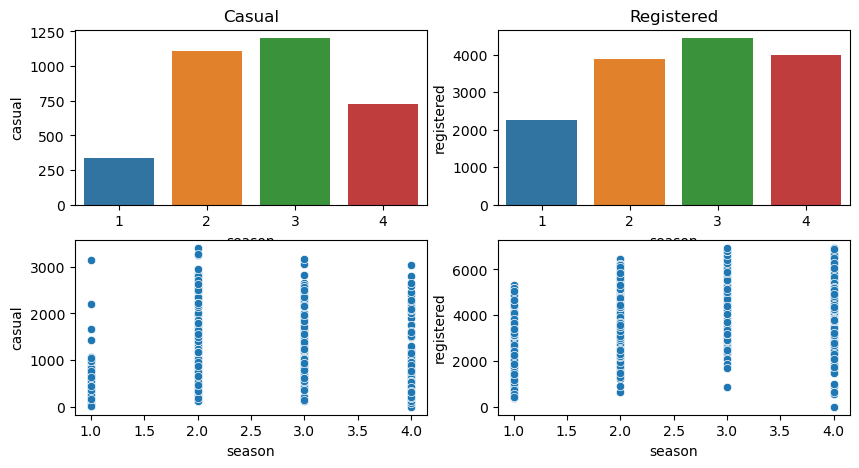

In [26]:
# Season

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(10,5))
sns.barplot(x="season", y="casual", data=df_outlier_impute, ci=None, ax=axs[0,0])
axs[0,0].set_title('Casual')
sns.barplot(x="season", y="registered", data=df_outlier_impute, ci=None,ax=axs[0,1])
axs[0,1].set_title('Registered')
sns.scatterplot(x = "season", y = "casual",data=df_outlier_impute, ax=axs[1,0])
sns.scatterplot(x = "season", y = "registered",data=df_outlier_impute, ax=axs[1,1])
#1: Spring, 2: Summer, 3: fall, 4:winter

<AxesSubplot:xlabel='yr', ylabel='registered'>

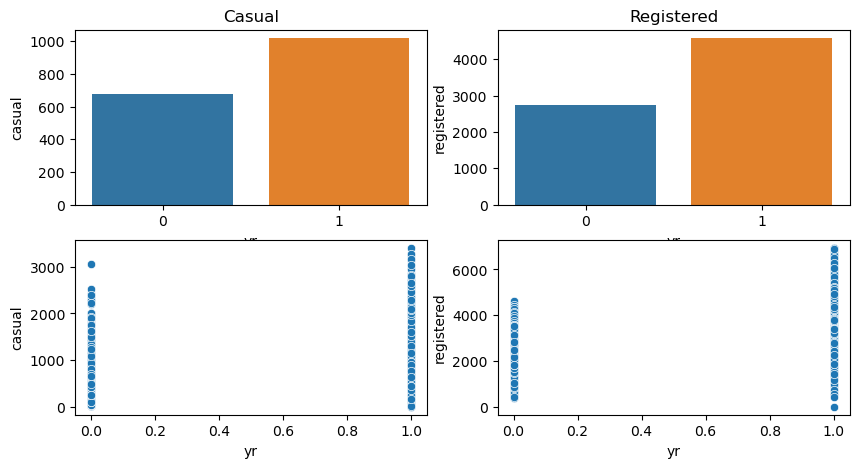

In [27]:
#Year

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(10,5))
sns.barplot(x="yr", y="casual", data=df_outlier_impute, ci=None,ax=axs[0,0])
axs[0,0].set_title('Casual')
sns.barplot(x="yr", y="registered", data=df_outlier_impute, ci=None,ax=axs[0,1])
axs[0,1].set_title('Registered')
sns.scatterplot(x = "yr", y = "casual",data=df_outlier_impute, ax=axs[1,0])
sns.scatterplot(x = "yr", y = "registered",data=df_outlier_impute, ax=axs[1,1])
# 1: 2012, 0: 2011

<AxesSubplot:xlabel='month', ylabel='registered'>

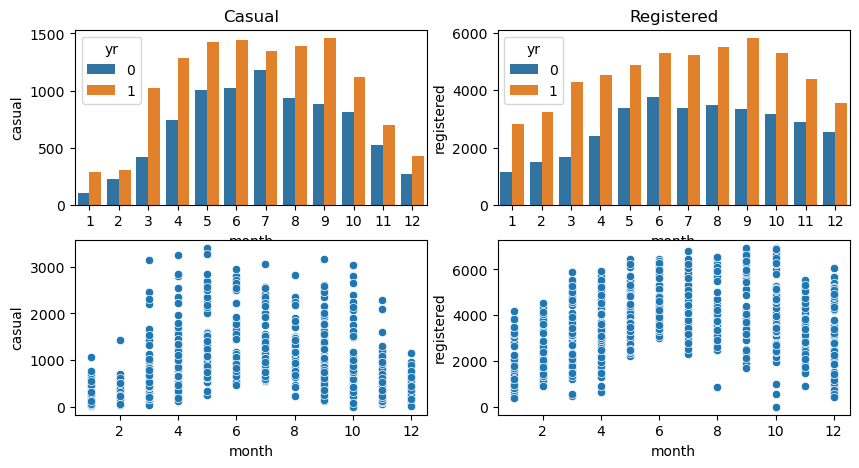

In [28]:
#Month

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(10,5))
sns.barplot(x="month", y="casual", data=df_outlier_impute, ci=None, hue='yr',ax=axs[0,0])
axs[0,0].set_title('Casual')
sns.barplot(x="month", y="registered", data=df_outlier_impute, ci=None,hue='yr',ax=axs[0,1])
axs[0,1].set_title('Registered')
sns.scatterplot(x = "month", y = "casual",data=df_outlier_impute, ax=axs[1,0])
sns.scatterplot(x = "month", y = "registered",data=df_outlier_impute, ax=axs[1,1])

<AxesSubplot:xlabel='weekday', ylabel='registered'>

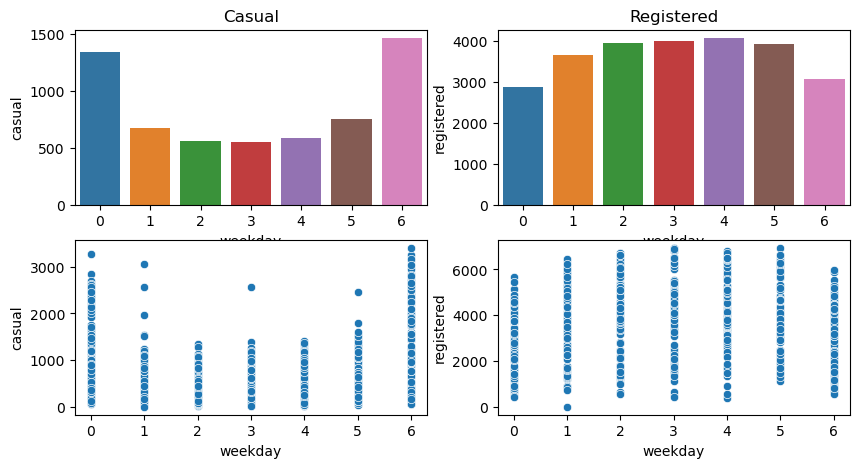

In [29]:
#Weekday

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(10,5))
sns.barplot(x="weekday", y="casual", data=df_outlier_impute, ci=None,ax=axs[0,0])
axs[0,0].set_title('Casual')
sns.barplot(x="weekday", y="registered", data=df_outlier_impute, ci=None,ax=axs[0,1])
axs[0,1].set_title('Registered')
sns.scatterplot(x = "weekday", y = "casual",data=df_outlier_impute, ax=axs[1,0])
sns.scatterplot(x = "weekday", y = "registered",data=df_outlier_impute, ax=axs[1,1])

<AxesSubplot:xlabel='holiday', ylabel='registered'>

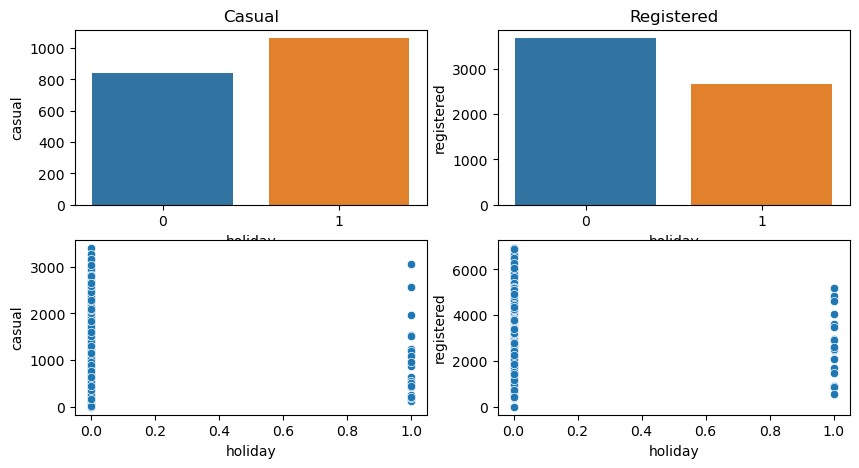

In [30]:
#Holiday

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(10,5))
sns.barplot(x="holiday", y="casual", data=df_outlier_impute, ci=None,ax=axs[0,0])
axs[0,0].set_title('Casual')
sns.barplot(x="holiday", y="registered", data=df_outlier_impute, ci=None,ax=axs[0,1])
axs[0,1].set_title('Registered')
sns.scatterplot(x = "holiday", y = "casual",data=df_outlier_impute, ax=axs[1,0])
sns.scatterplot(x = "holiday", y = "registered",data=df_outlier_impute, ax=axs[1,1])
#1: Holiday
#0: No holiday


<AxesSubplot:xlabel='workingday', ylabel='registered'>

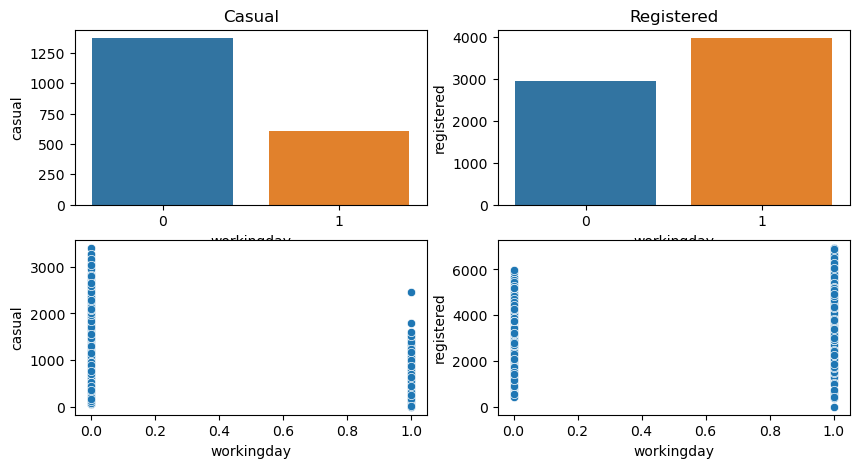

In [31]:
#Working Day

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(10,5))
sns.barplot(x="workingday", y="casual", data=df_outlier_impute, ci=None,ax=axs[0,0])
axs[0,0].set_title('Casual')
sns.barplot(x="workingday", y="registered", data=df_outlier_impute, ci=None,ax=axs[0,1])
axs[0,1].set_title('Registered')
sns.scatterplot(x = "workingday", y = "casual",data=df_outlier_impute, ax=axs[1,0])
sns.scatterplot(x = "workingday", y = "registered",data=df_outlier_impute, ax=axs[1,1])
#0: weekend or holiday
#1: Working day or weekdays

<AxesSubplot:xlabel='weather_category', ylabel='registered'>

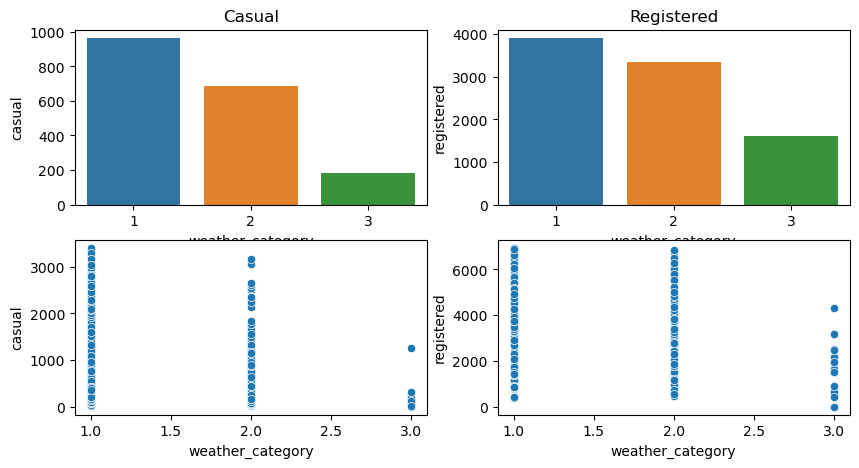

In [32]:
#Weather Category

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(10,5))
sns.barplot(x="weather_category", y="casual", data=df_outlier_impute, ci=None,ax=axs[0,0])
axs[0,0].set_title('Casual')
sns.barplot(x="weather_category", y="registered", data=df_outlier_impute, ci=None,ax=axs[0,1])
axs[0,1].set_title('Registered')
sns.scatterplot(x = "weather_category", y = "casual",data=df_outlier_impute, ax=axs[1,0])
sns.scatterplot(x = "weather_category", y = "registered",data=df_outlier_impute, ax=axs[1,1])

#1:Clear, Few clouds, Partly cloudy, Partly cloudy
#2:Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#3:Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<AxesSubplot:xlabel='temp', ylabel='registered'>

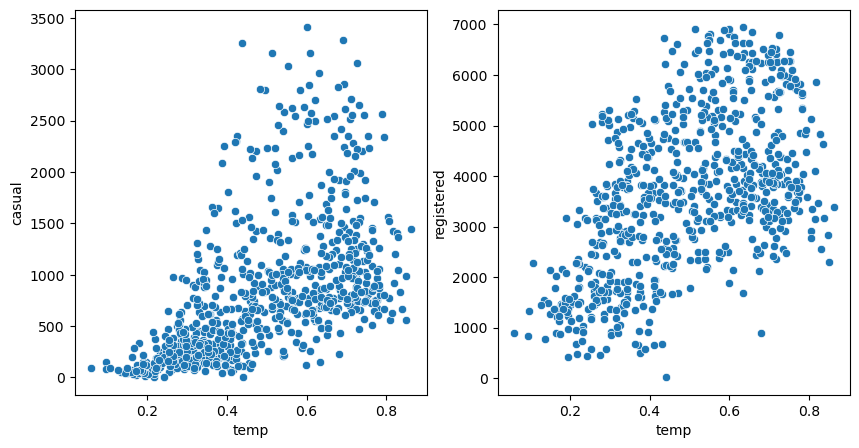

In [33]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x = "temp", y = "casual",data=df_outlier_impute, ax=axs[0])
sns.scatterplot(x = "temp", y = "registered",data=df_outlier_impute, ax=axs[1])

<AxesSubplot:xlabel='atemp', ylabel='registered'>

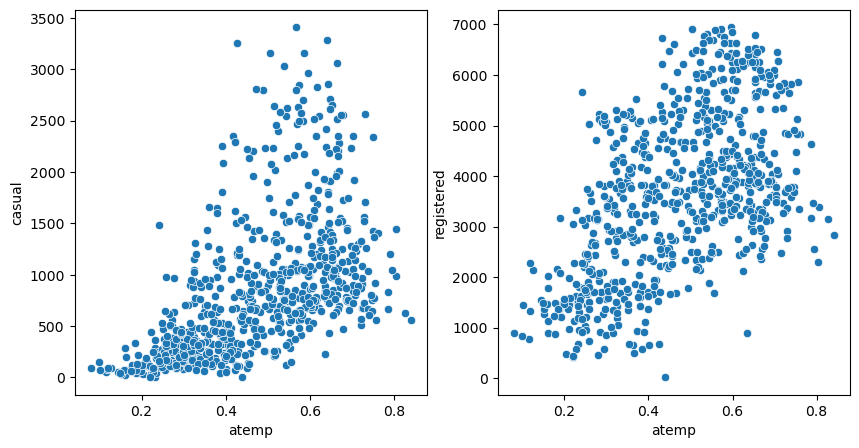

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x = "atemp", y = "casual",data=df_outlier_impute, ax=axs[0])
sns.scatterplot(x = "atemp", y = "registered",data=df_outlier_impute, ax=axs[1])

<AxesSubplot:xlabel='humidity', ylabel='registered'>

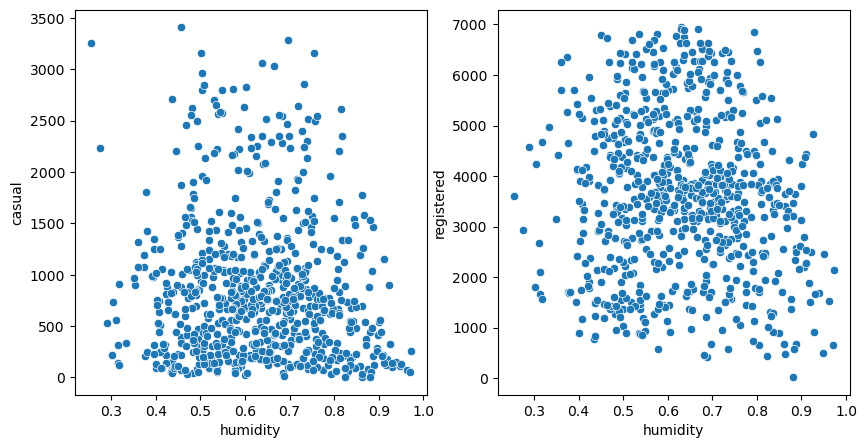

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x = "humidity", y = "casual",data=df_outlier_impute, ax=axs[0])
sns.scatterplot(x = "humidity", y = "registered",data=df_outlier_impute, ax=axs[1])

<AxesSubplot:xlabel='windspeed', ylabel='registered'>

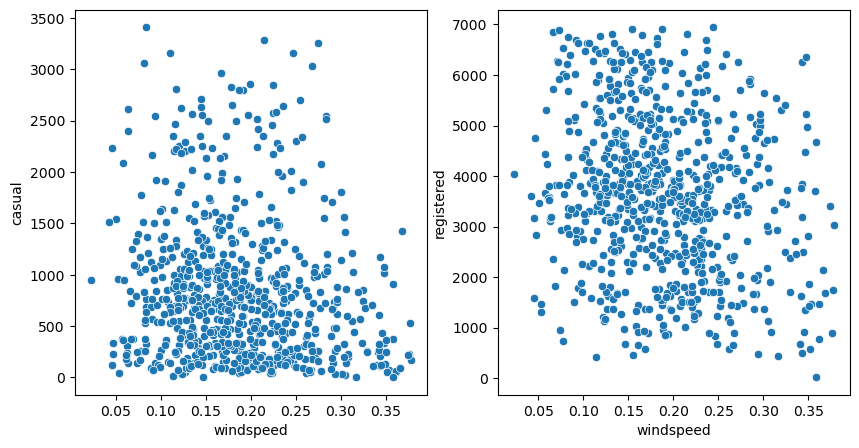

In [36]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x = "windspeed", y = "casual",data=df_outlier_impute, ax=axs[0])
sns.scatterplot(x = "windspeed", y = "registered",data=df_outlier_impute, ax=axs[1])


<AxesSubplot:xlabel='casual', ylabel='registered'>

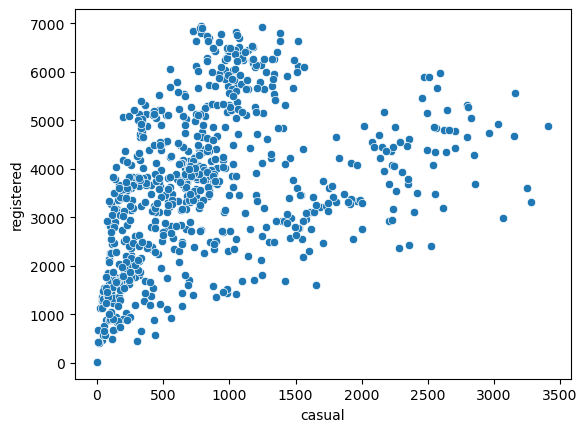

In [37]:
sns.scatterplot(x = "casual", y = "registered",data=df_outlier_impute)

In [38]:
x_casual = df_outlier_impute[['season', 'atemp', 'humidity', 'windspeed']]
x_registered = df_outlier_impute[['atemp', 'humidity', 'windspeed']]
y_casual = df_outlier_impute['casual']
y_registered = df_outlier_impute['registered']


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.tree import export_graphviz

In [40]:
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/ y_true))
    return mape

def MAE(y_true,y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

In [41]:
x_train_casual, x_test_casual, y_train_casual, y_test_casual = train_test_split(x_casual, y_casual, test_size = 0.4, random_state = 0)

In [42]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train_casual, y_train_casual)

DecisionTreeRegressor(random_state=0)

In [43]:
regressor.score(x_train_casual,y_train_casual)

1.0

In [44]:
y_predicted_d_casual = regressor.predict(x_test_casual)

In [64]:
x_test_casual

,season,atemp,humidity,windspeed
196,3,0.638263,0.585000,0.208342
187,3,0.686871,0.651250,0.159200
14,1,0.248112,0.498750,0.157963
31,1,0.234530,0.829565,0.053213
390,1,0.356050,0.769583,0.073396
...,...,...,...,...
0,1,0.363625,0.805833,0.160446
46,1,0.316200,0.423478,0.251791
171,3,0.637646,0.770417,0.171025
583,3,0.710246,0.654167,0.129354


In [45]:
regressor.feature_importances_


array([0.07296814, 0.53849166, 0.21037389, 0.17816631])

In [46]:
mse = MAE(y_test_casual,y_predicted_d_casual)
mape = MAPE(y_test_casual,y_predicted_d_casual)
print("Mean Squared Error:",mse)
print("Mean Absolute Percentage Error:",mape)
print("Accuracy : ",100-mape)

Mean Squared Error: 498.4778156996587
Mean Absolute Percentage Error: 0.9922268234163836
Accuracy :  99.00777317658361


In [47]:
x_train_registered, x_test_registered, y_train_registered, y_test_registered = train_test_split(x_registered, y_registered, test_size = 0.4, random_state = 0)


In [48]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train_registered, y_train_registered)

DecisionTreeRegressor(random_state=0)

(293, 3)

In [49]:
y_predicted_d_registered = regressor.predict(x_test_registered)

In [50]:
mse = MAE(y_test_registered,y_predicted_d_casual)
mape = MAPE(y_test_registered,y_predicted_d_casual)
print("Mean Squared Error:",mse)
print("Mean Absolute Percentage Error:",mape)

Mean Squared Error: 2762.2286689419793
Mean Absolute Percentage Error: 0.7537658250661452


In [51]:
x = df_outlier_impute.drop(columns=['total_count'], axis=1)
y = df_outlier_impute['total_count']

In [52]:
x_train, x_test, y_train, y_test_count = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [53]:
y_pred_count =y_predicted_d_registered + y_predicted_d_casual

5035.0

In [54]:
mse = MAE(y_test_count,y_pred_count)
mape = MAPE(y_test_count,y_pred_count)
print("Mean Squared Error:",mse)
print("Mean Absolute Percentage Error:",mape)

Mean Squared Error: 1431.8941979522185
Mean Absolute Percentage Error: 0.4236777495037923


In [55]:
from scipy.stats import pearsonr
corr, _ = pearsonr(y_pred_count,y_test_count)
print(corr)
print(corr**2)

0.5728716174050367
0.3281818900282627


In [56]:
from sklearn.metrics import r2_score

r2_score(y_pred_count,y_test_count)

0.1167221756020771

In [57]:
import pickle

In [58]:
pickle.dump(regressor,open('model.pkl','wb'))

In [60]:
model = pickle.load(open('model.pkl','rb'))

In [70]:
causal = model.predict([[0.638263,0.585000,0.208342]])
regd= model.predict([[0.638263,0.585000,0.208342]])

c:\Users\Akhil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\Akhil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [71]:
total_count = causal+regd

In [73]:
total_count[0]

8008.0